In [1]:
%%javascript
$.getScript('https://raw.githubusercontent.com/mlgill/ipython_notebook_goodies/gh-pages/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

# Challenge Set 3

| Title        | Answer                     |
| :---------- | :------------------------ |
| Topic:       | Linear Regression and Train/Test Split | 
| Date:        | 2016/07/17                 |
| Name:        | Michelle L. Gill           |
| Worked with: | None                       | 

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [33]:
import pandas as pd
import numpy as np

import statsmodels.formula.api as sm
from sklearn.cross_validation import train_test_split

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

sns.set_context('talk')
sns.set_palette('dark')
sns.set_style('white')

%matplotlib inline

In [34]:
data = pd.read_csv('../../../challenges_data/2013_movies.csv')
data.head(2)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00


There are 11 null values in the budget column.

In [35]:
data.isnull().sum()

Title                  0
Budget                11
DomesticTotalGross     0
Director               4
Rating                 0
Runtime                0
ReleaseDate            0
dtype: int64

In [36]:
data.loc[data.Budget.isnull(),'Budget'] = data.Budget.median()

In [37]:
data['ReleaseDate'] = pd.to_datetime(data.ReleaseDate)
data['ReleaseMonth'] = data.ReleaseDate.dt.month

## <a id='1'></a>Question 1

Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?

In [38]:
res1 = sm.ols('DomesticTotalGross ~ 1', data).fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 25 Jul 2016   Prob (F-statistic):                nan
Time:                        20:27:54   Log-Likelihood:                -1970.0
No. Observations:                 100   AIC:                             3942.
Df Residuals:                      99   BIC:                             3945.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1.006e+08   8.74e+06     11.510      0.000      8.33e+07  1.18e+08
==============================================================================
Omnibus:                       51.114   Durbin-Watson:                   0.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.961
Skew:                           1.985   Prob(JB):                     4.45e-28
Kurtosis:                       6.804   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

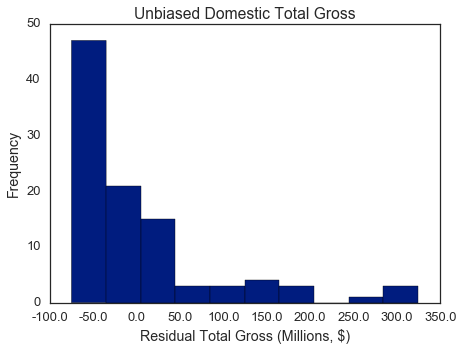

In [39]:
colors = sns.color_palette()

ax = res1.resid.hist(color=colors[0], figsize=(7,5))
ax.grid('off')

def scale_ticklabels(x, p):
    return "%.1f" % (x / (10 ** scale_pow))

scale_pow = 6
ax.get_xaxis().set_major_formatter(FuncFormatter(scale_ticklabels))

ax.set_xlabel('Residual Total Gross (Millions, $)')
ax.set_ylabel('Frequency')
ax.set_title('Unbiased Domestic Total Gross')

### Answer

In [40]:
print(data.DomesticTotalGross.mean()/1e6, res1.params[0]/1e6)

(100.59687522, 100.59687522000002)


In the presence of only a single, constant variable, the model returns the bias (mean) of the dependent data. The residuals will be simply the data values themselves with an offset (the mean) subtracted.

## <a id='2'></a>Question 2

Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?

In [41]:
res2 = sm.ols('DomesticTotalGross ~ Budget', data).fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     34.21
Date:                Mon, 25 Jul 2016   Prob (F-statistic):           6.53e-08
Time:                        20:27:58   Log-Likelihood:                -1955.0
No. Observations:                 100   AIC:                             3914.
Df Residuals:                      98   BIC:                             3919.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   4.335e+07   1.24e+07      3.505      0.001      1.88e+07  6.79e+07
Budget         0.7888      0.135      5.849      0.000         0.521     1.056
==============================================================================
Omnibus:                       41.061   Durbin-Watson:                   0.565
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.014
Skew:                           1.583   Prob(JB):                     1.05e-20
Kurtosis:                       6.472   Cond. No.                     1.50e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

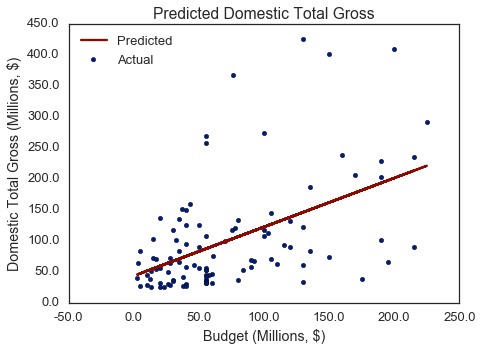

In [43]:
ax = data.plot('Budget','DomesticTotalGross',
              kind='scatter', label='Actual', color=colors[0], figsize=(7,5))
ax.plot(data.Budget, res2.predict(), label='Predicted', color=colors[2])

ax.legend(loc=2)
 
scale_pow = 6
ax.get_xaxis().set_major_formatter(FuncFormatter(scale_ticklabels))
ax.get_yaxis().set_major_formatter(FuncFormatter(scale_ticklabels))

ax.set_xlabel('Budget (Millions, $)')
ax.set_ylabel('Domestic Total Gross (Millions, $)')
ax.set_title('Predicted Domestic Total Gross')

### Answer

The model can be interpreted by plotting a best fit line (as was done here) or by plotting the residuals. Alternatively, a correlation plot of fit vs predicted Domestic Total Gross could have also been made.

## <a id='3'></a>Question 3

Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?

In [44]:
res3 = sm.ols('DomesticTotalGross ~ 1 + Rating', data).fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     3.924
Date:                Mon, 25 Jul 2016   Prob (F-statistic):             0.0109
Time:                        20:28:10   Log-Likelihood:                -1964.2
No. Observations:                 100   AIC:                             3936.
Df Residuals:                      96   BIC:                             3947.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept        2.685e+08   8.38e+07      3.205      0.002      1.02e+08  4.35e+08
Rating[T.PG]    -1.374e+08   8.65e+07     -1.588      0.116     -3.09e+08  3.44e+07
Rating[T.PG-13]  -1.57e+08   8.47e+07     -1.855      0.067     -3.25e+08   1.1e+07
Rating[T.R]     -1.986e+08   8.49e+07     -2.340      0.021     -3.67e+08 -3.01e+07
==============================================================================
Omnibus:                       46.897   Durbin-Watson:                   0.240
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.261
Skew:                           1.826   Prob(JB):                     1.88e-24
Kurtosis:                       6.589   Cond. No.                         23.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

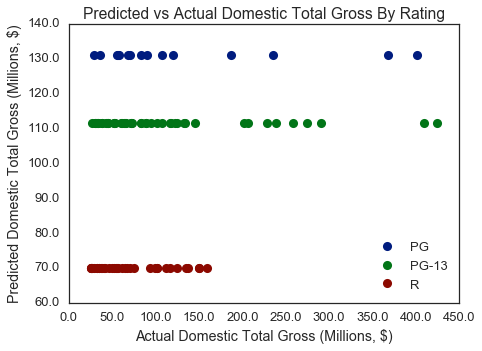

In [45]:
f = plt.figure()
f.set_size_inches(7,5)
ax = plt.axes()

for rating in ['PG', 'PG-13', 'R']:
    mask = data.Rating==rating
    actual = data.DomesticTotalGross.loc[mask]
    predict = res3.predict()[mask.values]
    ax.plot(actual, predict,
            marker='o', ls='', label=rating)

ax.legend(loc=0)
 
scale_pow = 6
ax.get_xaxis().set_major_formatter(FuncFormatter(scale_ticklabels))
ax.get_yaxis().set_major_formatter(FuncFormatter(scale_ticklabels))

ax.set_xlabel('Actual Domestic Total Gross (Millions, $)')
ax.set_ylabel('Predicted Domestic Total Gross (Millions, $)')
ax.set_title('Predicted vs Actual Domestic Total Gross By Rating')

### Answer

As this model only has a category, the results are similar to the results of question 1, except that the mean for each category (rating) is predicted. This can be seen by comparing the plot to the table below it.

In [46]:
data[['Rating','DomesticTotalGross']].groupby('Rating').mean()/1e6

,DomesticTotalGross
Rating,
G,268.492764
PG,131.135716
PG-13,111.449769
R,69.892429


In [47]:
res3.params[0]/1e6, (res3.params[1]+res3.params[0])/1e6, (res3.params[2]+res3.params[0])/1e6

(268.49276399999934, 131.13571606666653, 111.44976902127648)

## <a id='4'></a>Question 4

Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.

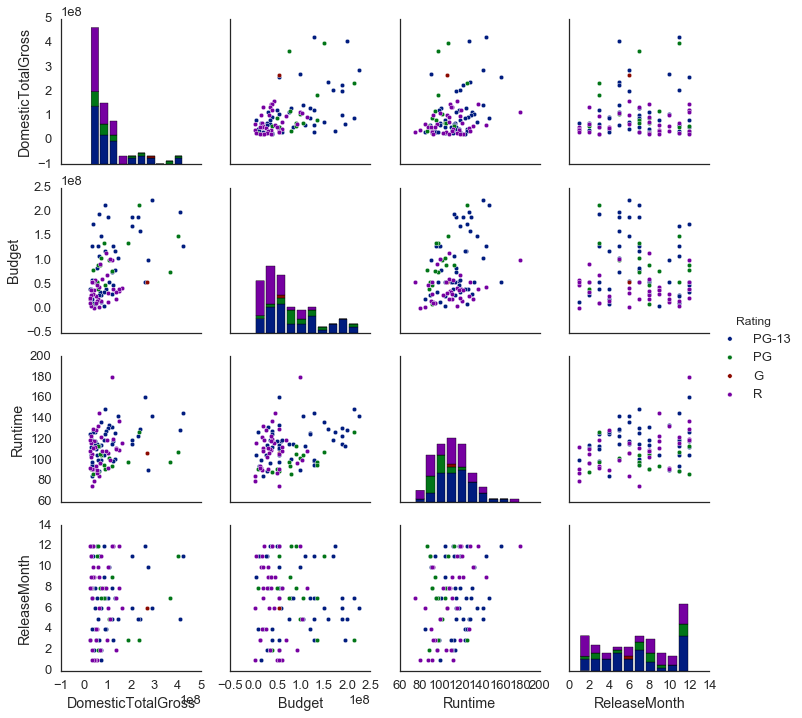

In [48]:
# Decide which features to use based on the correlation plots
sns.pairplot(data[['DomesticTotalGross','Budget','Runtime','ReleaseMonth','Rating']],
            hue='Rating')

In [49]:
res4 = sm.ols('np.log(DomesticTotalGross) ~ 1 + np.log(Budget) + Runtime + Rating', data).fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     np.log(DomesticTotalGross)   R-squared:                       0.309
Model:                                    OLS   Adj. R-squared:                  0.272
Method:                         Least Squares   F-statistic:                     8.396
Date:                        Mon, 25 Jul 2016   Prob (F-statistic):           1.35e-06
Time:                                20:28:19   Log-Likelihood:                -90.652
No. Observations:                         100   AIC:                             193.3
Df Residuals:                              94   BIC:                             208.9
Df Model:                                   5                                         
Covariance Type:                    nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept          13.6716      1.441      9.486      0.000        10.810    16.533
Rating[T.PG]       -1.0441      0.640     -1.632      0.106        -2.314     0.226
Rating[T.PG-13]    -1.3235      0.626     -2.116      0.037        -2.566    -0.081
Rating[T.R]        -1.4000      0.628     -2.228      0.028        -2.648    -0.152
np.log(Budget)      0.2611      0.079      3.324      0.001         0.105     0.417
Runtime             0.0101      0.004      2.590      0.011         0.002     0.018
==============================================================================
Omnibus:                        6.562   Durbin-Watson:                   0.737
Prob(Omnibus):                  0.038   Jarque-Bera (JB):                3.844
Skew:                           0.288   Prob(JB):                        0.146
Kurtosis:                       2.232   Cond. No.                     2.90e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Answer

This is a considerably more complicated model with log-transformed data and categorical. Based on the P-values, I'd say budget is the primary important predictor of Domestic Total Gross.

## <a id='5'></a>Question 5

Fitting and checking predictions on the exact same data set can be misleading. Divide your data into two sets: a training and a test set (roughly 75% training, 25% test is a fine split). Fit a model on the training set, check the predictions (by plotting versus actual values) in the test set.

In [50]:
train, test = train_test_split(data, test_size=0.25, random_state=4444)

In [51]:
res5 = sm.ols('np.log(DomesticTotalGross) ~ 1 + np.log(Budget) + Runtime + Rating', train).fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     np.log(DomesticTotalGross)   R-squared:                       0.295
Model:                                    OLS   Adj. R-squared:                  0.244
Method:                         Least Squares   F-statistic:                     5.779
Date:                        Mon, 25 Jul 2016   Prob (F-statistic):           0.000163
Time:                                20:28:19   Log-Likelihood:                -66.768
No. Observations:                          75   AIC:                             145.5
Df Residuals:                              69   BIC:                             159.4
Df Model:                                   5                                         
Covariance Type:                    nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept          13.8724      1.632      8.500      0.000        10.617    17.128
Rating[T.PG]       -1.0115      0.651     -1.554      0.125        -2.310     0.287
Rating[T.PG-13]    -1.3225      0.625     -2.116      0.038        -2.569    -0.076
Rating[T.R]        -1.3309      0.627     -2.122      0.037        -2.582    -0.080
np.log(Budget)      0.2614      0.090      2.888      0.005         0.081     0.442
Runtime             0.0082      0.004      1.914      0.060        -0.000     0.017
==============================================================================
Omnibus:                        6.427   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.040   Jarque-Bera (JB):                3.039
Skew:                           0.220   Prob(JB):                        0.219
Kurtosis:                       2.117   Cond. No.                     2.77e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
predict = np.exp(res5.predict(test))

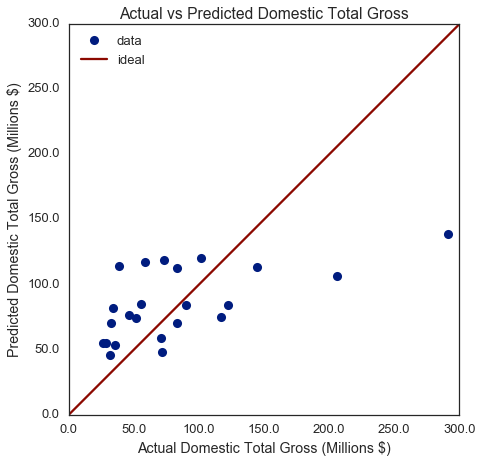

In [53]:
f = plt.figure()
f.set_size_inches(7,7)
ax = plt.axes()

ax.plot(test.DomesticTotalGross, predict, marker='o', ls='', label='data')
ax.plot([0,3e8],[0,3e8], color=colors[2], label='ideal', marker='', ls='-')
ax.set_xlim(0,3e8)
ax.set_ylim(ax.get_xlim())

ax.legend(loc=0)

scale_pow = 6
ax.get_xaxis().set_major_formatter(FuncFormatter(scale_ticklabels))
ax.get_yaxis().set_major_formatter(FuncFormatter(scale_ticklabels))

_ = ax.set(xlabel='Actual Domestic Total Gross (Millions $)', 
           ylabel='Predicted Domestic Total Gross (Millions $)',
           title='Actual vs Predicted Domestic Total Gross')